Time Series -Greater Ekofisk Area

# Step A     DATA GATHERING

In [1]:
# script to download the csv file from 'https://factpages.npd.no/en/field/TableView/Production/Saleable/Monthly'
import requests
r = requests.get('https://factpages.npd.no/ReportServer_npdpublic?/FactPages/tableview/field_production_monthly&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&IpAddress=not_used&CultureCode=en&rs:Format=CSV&Top100=false')
data=r.content
csv_file=open('field_production_monthly.csv','wb')
csv_file.write(data)
csv_file.close()

In [2]:
###Importing libraries and read dataset for the casestudy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('field_production_monthly.csv')
print("\t Original 'field_production_monthly.csv' CSV Data: \n")
df
df.info()
df.head()  

	 Original 'field_production_monthly.csv' CSV Data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23955 entries, 0 to 23954
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   prfInformationCarrier              23955 non-null  object 
 1   prfYear                            23955 non-null  int64  
 2   prfMonth                           23955 non-null  int64  
 3   prfPrdOilNetMillSm3                23955 non-null  float64
 4   prfPrdGasNetBillSm3                23955 non-null  float64
 5   prfPrdNGLNetMillSm3                23955 non-null  float64
 6   prfPrdCondensateNetMillSm3         23955 non-null  float64
 7   prfPrdOeNetMillSm3                 23955 non-null  float64
 8   prfPrdProducedWaterInFieldMillSm3  23955 non-null  float64
 9   prfNpdidInformationCarrier         23955 non-null  int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 1.8+ MB


,prfInformationCarrier,prfYear,prfMonth,prfPrdOilNetMillSm3,prfPrdGasNetBillSm3,prfPrdNGLNetMillSm3,prfPrdCondensateNetMillSm3,prfPrdOeNetMillSm3,prfPrdProducedWaterInFieldMillSm3,prfNpdidInformationCarrier
0,16/1-12 Troldhaugen,2021,8,0.00653,0.0,0.0,0.0,0.00653,0.0,17196400
1,16/1-12 Troldhaugen,2021,9,0.01053,0.0,0.0,0.0,0.01053,0.0,17196400
2,16/1-12 Troldhaugen,2021,10,0.01238,0.0,0.0,0.0,0.01238,0.0,17196400
3,16/1-12 Troldhaugen,2021,11,0.01298,0.0,0.0,0.0,0.01298,0.0,17196400
4,16/1-12 Troldhaugen,2021,12,0.00461,0.0,0.0,0.0,0.00461,0.0,17196400


DATA PROCESSING

Checking Missing Values in the data

In [4]:
df.isna().sum()

prfInformationCarrier                0
prfYear                              0
prfMonth                             0
prfPrdOilNetMillSm3                  0
prfPrdGasNetBillSm3                  0
prfPrdNGLNetMillSm3                  0
prfPrdCondensateNetMillSm3           0
prfPrdOeNetMillSm3                   0
prfPrdProducedWaterInFieldMillSm3    0
prfNpdidInformationCarrier           0
dtype: int64

Hence , there are no missing values in any column

# STEP-B  #Dropping Columns except first Four including (prfInformationCarrier,prfYear,prfMonth,prfPrdOilNetMillSm3)

In [5]:
dff=df
dff=dff.drop(dff.iloc[:, 4:10], axis = 1) 
dff

,prfInformationCarrier,prfYear,prfMonth,prfPrdOilNetMillSm3
0,16/1-12 Troldhaugen,2021,8,0.00653
1,16/1-12 Troldhaugen,2021,9,0.01053
2,16/1-12 Troldhaugen,2021,10,0.01238
3,16/1-12 Troldhaugen,2021,11,0.01298
4,16/1-12 Troldhaugen,2021,12,0.00461
...,...,...,...,...
23950,AASTA HANSTEEN,2022,7,0.00000
23951,AASTA HANSTEEN,2022,8,0.00000
23952,AASTA HANSTEEN,2022,9,0.00000
23953,AASTA HANSTEEN,2022,10,0.00000


# STEP-C   #Keep production data for EKOFISK, ELDFISK, EMBLA from January 2013 onwards, delete allother rows

In [6]:
dff=dff[(dff['prfYear']>=2013) & (dff['prfInformationCarrier'].isin (['EKOFISK','ELDFISK','EMBLA']))]
dff

,prfInformationCarrier,prfYear,prfMonth,prfPrdOilNetMillSm3
3252,EKOFISK,2013,1,0.59815
3253,EKOFISK,2013,2,0.51963
3254,EKOFISK,2013,3,0.57016
3255,EKOFISK,2013,4,0.54193
3256,EKOFISK,2013,5,0.56972
...,...,...,...,...
4241,EMBLA,2022,7,0.00548
4242,EMBLA,2022,8,0.00714
4243,EMBLA,2022,9,0.00690
4244,EMBLA,2022,10,0.00695


# STEP D-  #Convert production data to thousand barrel per day using https://www.npd.no/en/about-us/information-services/conversion-table/

In [7]:
dff['Production']=dff['prfPrdOilNetMillSm3']*6.29*1000/30
dff

C:\Users\Hricha\AppData\Local\Temp\ipykernel_17244\3867675795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Production']=dff['prfPrdOilNetMillSm3']*6.29*1000/30


,prfInformationCarrier,prfYear,prfMonth,prfPrdOilNetMillSm3,Production
3252,EKOFISK,2013,1,0.59815,125.412117
3253,EKOFISK,2013,2,0.51963,108.949090
3254,EKOFISK,2013,3,0.57016,119.543547
3255,EKOFISK,2013,4,0.54193,113.624657
3256,EKOFISK,2013,5,0.56972,119.451293
...,...,...,...,...,...
4241,EMBLA,2022,7,0.00548,1.148973
4242,EMBLA,2022,8,0.00714,1.497020
4243,EMBLA,2022,9,0.00690,1.446700
4244,EMBLA,2022,10,0.00695,1.457183


# STEP E  #For each year/month, sum up the production data for the three fields and assign the name
“Greater Ekofisk Area” to the time series

In [8]:
dff=dff.groupby(['prfYear','prfMonth'],as_index=False).sum()


C:\Users\Hricha\AppData\Local\Temp\ipykernel_17244\3966986440.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dff=dff.groupby(['prfYear','prfMonth'],as_index=False).sum()


In [9]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   prfYear              119 non-null    int64  
 1   prfMonth             119 non-null    int64  
 2   prfPrdOilNetMillSm3  119 non-null    float64
 3   Production           119 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 3.8 KB


# STEP f.   #Create a ‘date’ column based on the given
year/month combinations (year = 2013, month = 1 -&gt; 01/01/2013)

In [10]:
dff['Date'] = pd.to_datetime(dict(year=dff.prfYear, month=dff.prfMonth, day=1))
dff

,prfYear,prfMonth,prfPrdOilNetMillSm3,Production,Date
0,2013,1,0.81037,169.907577,2013-01-01
1,2013,2,0.72091,151.150797,2013-02-01
2,2013,3,0.78273,164.112390,2013-03-01
3,2013,4,0.72379,151.754637,2013-04-01
4,2013,5,0.71815,150.572117,2013-05-01
...,...,...,...,...,...
114,2022,7,0.64375,134.972917,2022-07-01
115,2022,8,0.62479,130.997637,2022-08-01
116,2022,9,0.60307,126.443677,2022-09-01
117,2022,10,0.62009,130.012203,2022-10-01


In [11]:
dff.head()

,prfYear,prfMonth,prfPrdOilNetMillSm3,Production,Date
0,2013,1,0.81037,169.907577,2013-01-01
1,2013,2,0.72091,151.150797,2013-02-01
2,2013,3,0.78273,164.112390,2013-03-01
3,2013,4,0.72379,151.754637,2013-04-01
4,2013,5,0.71815,150.572117,2013-05-01


In [12]:
dff=dff.drop(['prfYear','prfMonth','prfPrdOilNetMillSm3'],axis=1)
dff.index=dff['Date']

# STEP_G   #Create the output table having the columns: project (step e.), date (step f.), production (step d.) 

In [13]:
#final columns we will be using to predict the Target variable.
#final columns we will be using to predict the Target variable.
dff=dff.drop(['Date'],axis=1)
dff

,Production
Date,
2013-01-01,169.907577
2013-02-01,151.150797
2013-03-01,164.112390
2013-04-01,151.754637
2013-05-01,150.572117
...,...
2022-07-01,134.972917
2022-08-01,130.997637
2022-09-01,126.443677


In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

from tqdm import tqdm_notebook

from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


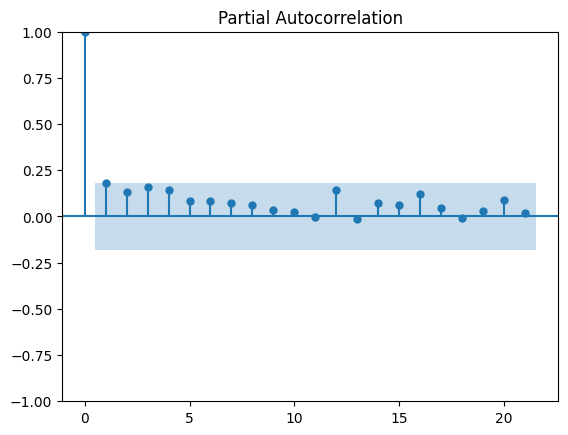

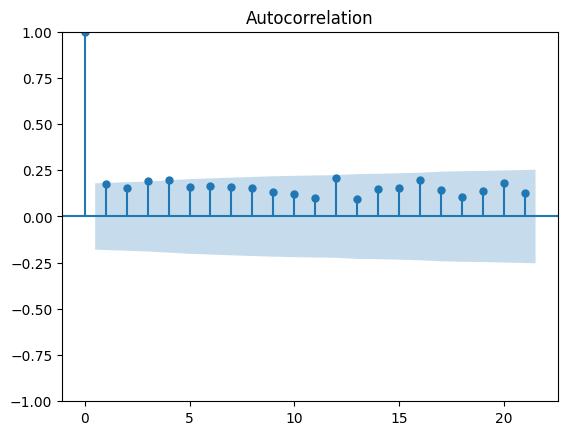

In [15]:
#plotting ACF,PACF plots
plot_pacf(dff['Production']);
plot_acf(dff['Production']);

# Stationarity Check 

we have imported the adfuller() module along with the numpy's log module and pandas. 
We have then used the adfuller method and printed the values to the user.

It is necessary to check whether the series is stationary or not. If not, we have to use difference; else, d becomes zero.

The Augmented Dickey-Fuller (ADF) test's 
null hypothesis is that the time series is not stationary. 
Thus, if the ADF test's p-value is less than the significance level (0.05), 
then we will reject the null hypothesis and infer that the time series is definitely stationary.

In [31]:
ad_fuller_result = adfuller(dff['Production'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.5015961458329947
p-value: 0.007946196153876175


Here p-value<0.5 so our dataset is stationary. 

#We are ready to plot the predictions of our model and forecast into the future:

# Performing Decomposition to Check Seasonality 

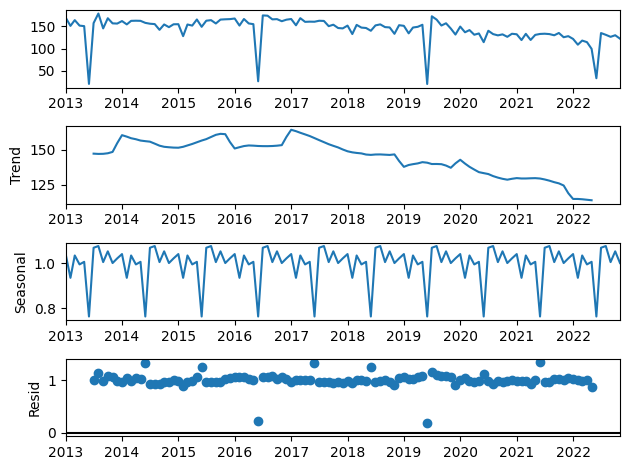

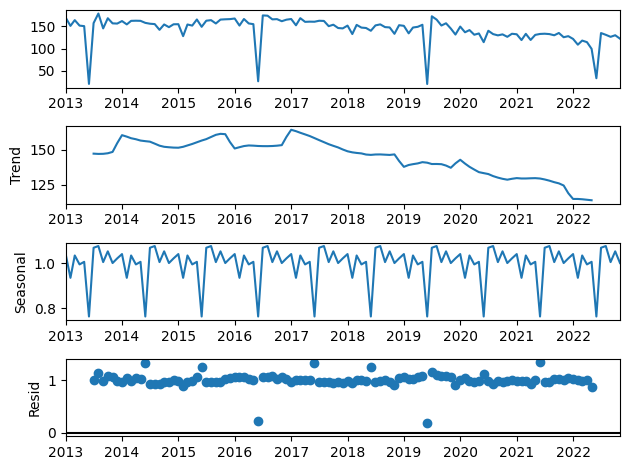

In [17]:

from statsmodels.tsa.seasonal import seasonal_decompose

#dff.set_index('Date', inplace=True)

analysis = dff[['Production']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()

# Splitting train /test data 100/19

In [18]:
dff

,Production
Date,
2013-01-01,169.907577
2013-02-01,151.150797
2013-03-01,164.112390
2013-04-01,151.754637
2013-05-01,150.572117
...,...
2022-07-01,134.972917
2022-08-01,130.997637
2022-09-01,126.443677


In [19]:
train=dff[:100]
test=dff[100:]

train.head()

,Production
Date,
2013-01-01,169.907577
2013-02-01,151.150797
2013-03-01,164.112390
2013-04-01,151.754637
2013-05-01,150.572117


In [32]:
#importing libraries to perform sarima model
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt

<AxesSubplot: xlabel='Date'>

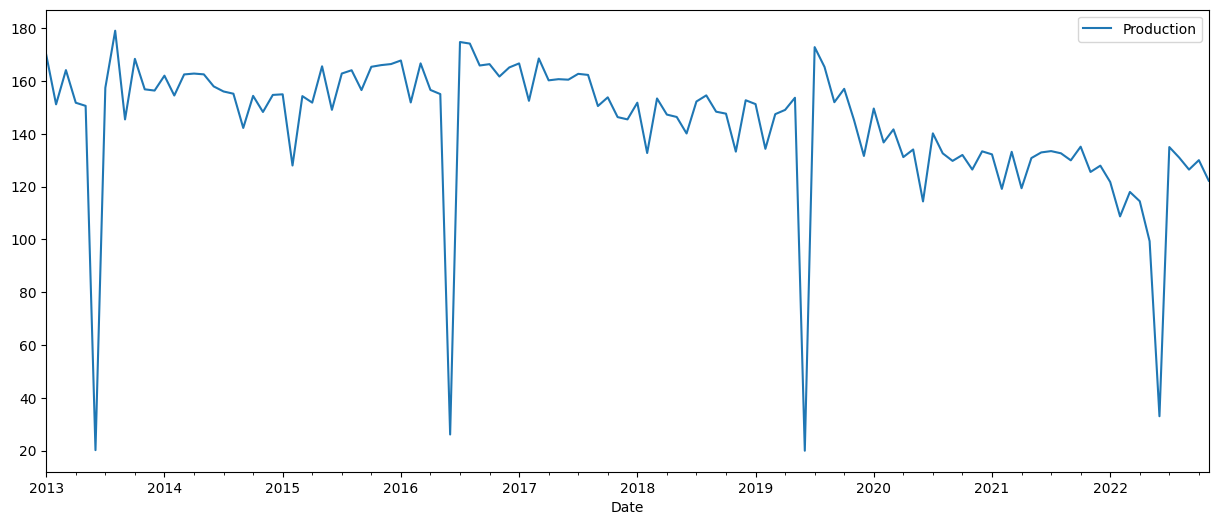

In [21]:
dff['Production'].plot(legend=True,figsize=(15,6))



In [22]:
model = SARIMAX(dff['Production'], order=(0,1,1), seasonal_order=(0, 0, 1, 12))
results = model.fit()

In [23]:
pred = results.predict(0,len(dff))

pred.tail()

2022-08-01    133.715337
2022-09-01    126.113071
2022-10-01    133.497015
2022-11-01    127.761893
2022-12-01    109.926954
Freq: MS, Name: predicted_mean, dtype: float64

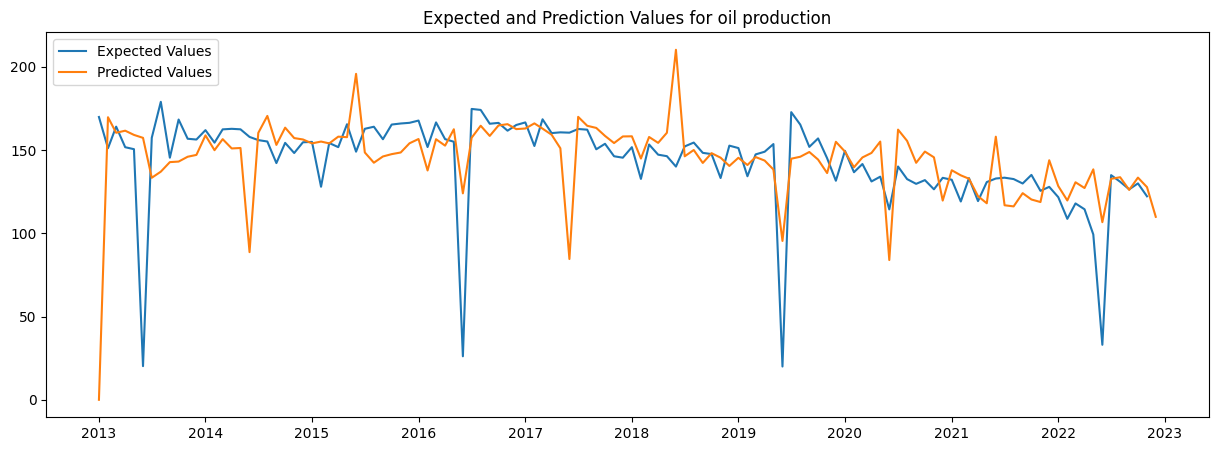

In [24]:

fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(dff['Production'],label = 'Expected Values')
plt.plot(pred,label = 'Predicted Values');
plt.legend(loc="upper left")
plt.title('Expected and Prediction Values for oil production',)
plt.show()

Plotting Actual values for Production in 2013 onwards to 2022 and Predicted Value for 2023

In [25]:
#Now we are able to perform prediction and forecast into the future
model = SARIMAX(dff['Production'], order=(0,1,1), seasonal_order=(0, 0, 1, 12))
results = model.fit()
final_pred=results.predict(len(dff),len(dff)+12)
final_pred=pd.DataFrame(final_pred)


In [26]:
final_pred = final_pred.rename({"predicted_mean":"Production"}, axis='columns')
final_res=dff.append(final_pred)
final_res.tail(12)

,Production
2023-01-01,116.364253
2023-02-01,112.557054
2023-03-01,110.614523
2023-04-01,109.865284
2023-05-01,88.451580
2023-06-01,59.139746
2023-07-01,114.636062
2023-08-01,110.878118
2023-09-01,113.121085
2023-10-01,110.142318


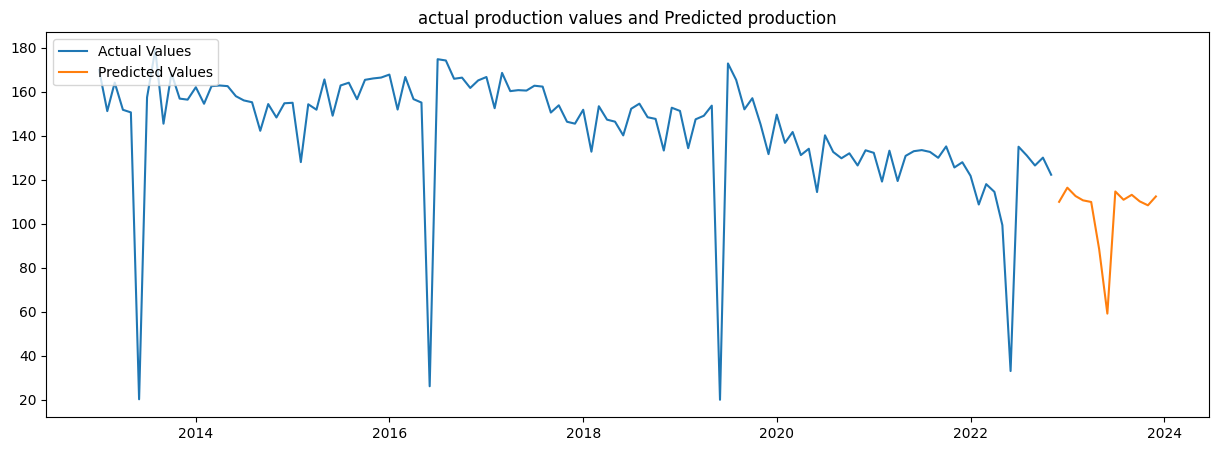

In [27]:
#Plotting actual and Predicted Values
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))
plt.subplot(1,1,1)
plt.plot(dff['Production'],label = 'Actual Values')
plt.plot(final_pred,label = 'Predicted Values');
plt.legend(loc="upper left")
plt.title('actual production values and Predicted production')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


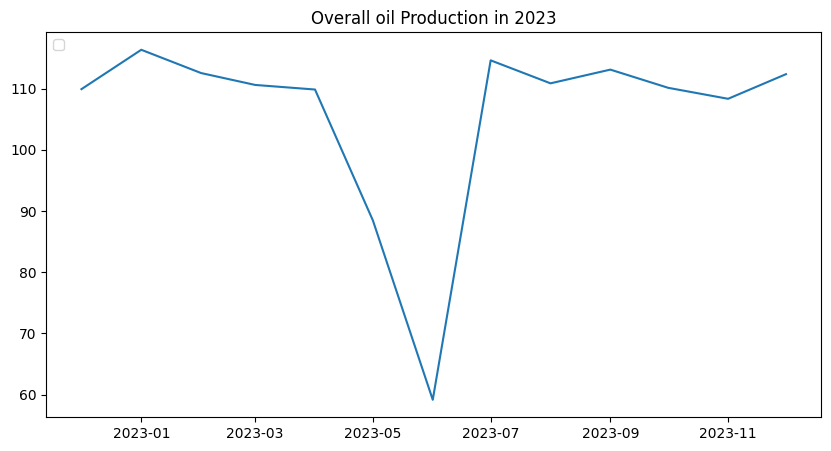

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(final_pred)
plt.legend(loc="upper left")
plt.title("Overall oil Production in 2023")
plt.show()

Merging the actual oil production value and the predicted value in a single plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


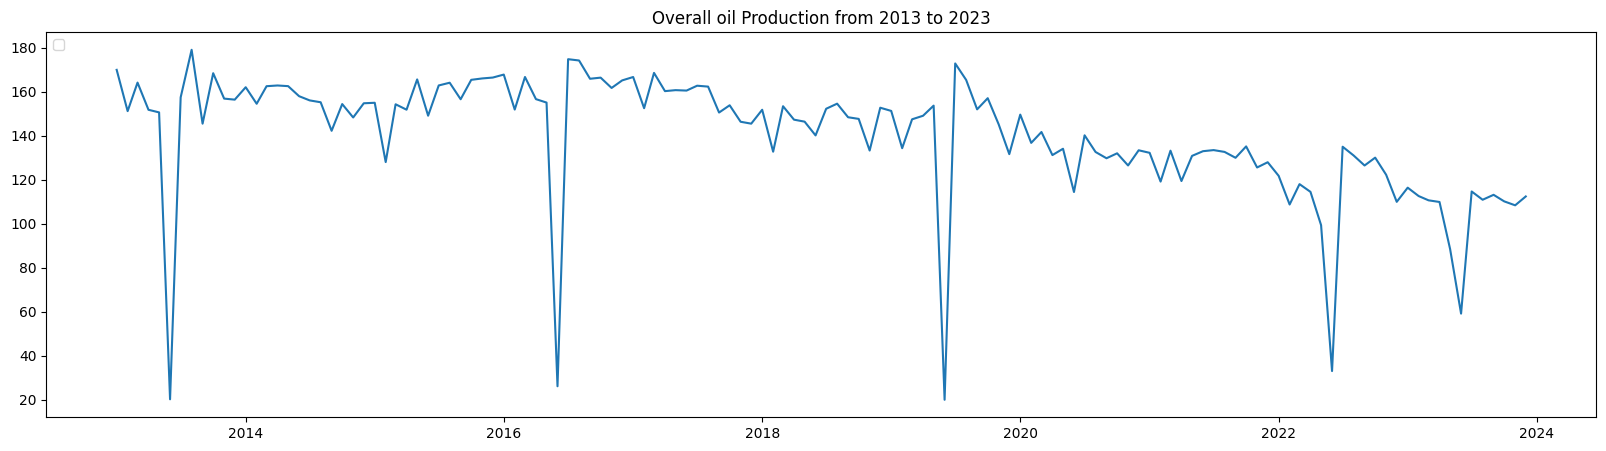

In [29]:
plt.figure(figsize=(20, 5))
plt.plot(final_res)
plt.legend(loc="upper left")
plt.title("Overall oil Production from 2013 to 2023")
plt.show()

Summary of the Project 
1. Data Gathering
2. Data Processing using Fundamental libraries(pandas,numpy)
3. Checking if the data is stationary or Seasonal as per the time series data concepts
4. P-value calculated using Dickey-Fuller test whic came out to be less than 0.05 so data is stationary
5. After that checking Seasonality using decomposition we found data to be seasonal so we will be using SARIMA MODEL to fit our Time series data
3. Modelling the final dataFrame say(dff) and Predicting the production value for the year 2023 for each month which is stored in the DataFrame FINAL_PRED

In [30]:

""""from pmdarima import auto_arima
# Fit auto_arima function to  dataset
stepwise_fit = auto_arima(dff['Production'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                           d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()"""

'"from pmdarima import auto_arima\n# Fit auto_arima function to  dataset\nstepwise_fit = auto_arima(dff[\'Production\'], start_p = 1, start_q = 1,\n                          max_p = 3, max_q = 3, m = 12,\n                          start_P = 0, seasonal = True,\n                           d = None, D = 1, trace = True,\n                          error_action =\'ignore\',   # we don\'t want to know if an order does not work\n                          suppress_warnings = True,  # we don\'t want convergence warnings\n                          stepwise = True)           # set to stepwise\n  \n# To print the summary\nstepwise_fit.summary()'